<a href="https://colab.research.google.com/github/herny25/SIS420/blob/main/PrimerEjercicio_SegundoParcialconDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# utilizado para manejos de directorios y rutas
import os
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split

In [ ]:
#Carga de dataset
#Link del dataset https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-diseasedata = pd.read_csv('heart_2020_cleaned.csv', header=0)


In [ ]:
# imprimimos el dataset
print(data)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [ ]:
# observamos si faltan datos o tenemos string en los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# seleccionamos los datos string para cambiarlos a numericos
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [ ]:

# iteramos y transformamos los datos de tipo object a tipo int
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [ ]:

# confirmamos tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [ ]:
#Imprimimos nuevamente el dataset para verificar
print(data)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

In [ ]:
#Observamos las columnas del dataset
print(data.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [ ]:
#llenamos las columnas que tengan datos vacios
vacios = ['BMI','PhysicalHealth', 'MentalHealth', 'SleepTime']
media_columnas = data[vacios].mean()
data[vacios] = data[vacios].fillna(media_columnas)

In [ ]:
# verificamos que ya no haya datos vacios
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int32  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int32  
 3   AlcoholDrinking   319795 non-null  int32  
 4   Stroke            319795 non-null  int32  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int32  
 8   Sex               319795 non-null  int32  
 9   AgeCategory       319795 non-null  int32  
 10  Race              319795 non-null  int32  
 11  Diabetic          319795 non-null  int32  
 12  PhysicalActivity  319795 non-null  int32  
 13  GenHealth         319795 non-null  int32  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int32  
 16  KidneyDisease     31

In [ ]:

# seleccionamos los datos para X y y
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size



In [ ]:
# imprimimos los datos que estaran en X y separados por una linea de *, los datos de y
print(X)
print('*'*15)
print(y)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0       16.60        1                0       0             3.0          30.0   
1       20.34        0                0       1             0.0           0.0   
2       26.58        1                0       0            20.0          30.0   
3       24.21        0                0       0             0.0           0.0   
4       23.71        0                0       0            28.0           0.0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0             7.0           0.0   
319791  29.84        1                0       0             0.0           0.0   
319792  24.24        0                0       0             0.0           0.0   
319793  32.81        0                0       0             0.0           0.0   
319794  46.56        0                0       0             0.0           0.0   

        DiffWalking  Sex  A

In [ ]:
# cargamos los datos y las etiquetas correspondientes
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [ ]:
print(X)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0       16.60        1                0       0             3.0          30.0   
1       20.34        0                0       1             0.0           0.0   
2       26.58        1                0       0            20.0          30.0   
3       24.21        0                0       0             0.0           0.0   
4       23.71        0                0       0            28.0           0.0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0             7.0           0.0   
319791  29.84        1                0       0             0.0           0.0   
319792  24.24        0                0       0             0.0           0.0   
319793  32.81        0                0       0             0.0           0.0   
319794  46.56        0                0       0             0.0           0.0   

        DiffWalking  Sex  A

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
0       16.60        1                0       0             3.0          30.0   
1       20.34        0                0       1             0.0           0.0   
2       26.58        1                0       0            20.0          30.0   
3       24.21        0                0       0             0.0           0.0   
4       23.71        0                0       0            28.0           0.0   
...       ...      ...              ...     ...             ...           ...   
319790  27.41        1                0       0             7.0           0.0   
319791  29.84        1                0       0             0.0           0.0   
319792  24.24        0                0       0             0.0           0.0   
319793  32.81        0                0       0             0.0           0.0   
319794  46.56        0                0       0             0.0           0.0   

        DiffWalking  Sex  A

In [ ]:
#X_array = [0,0,0,3,3,0,0,6,4,0,0,2,7,0,0,0,1]
#X = (X_array[1:17] - mu) / sigma

In [ ]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
  
    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [ ]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción. 
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    
    return J

In [ ]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-2.27432409  0.0233045   0.13346543 -0.04322836  0.20049056  0.13486276
  0.01435268  0.15006689  0.19261264  0.39881007  0.04143913  0.17587369
 -0.04759127 -0.01959227 -0.00259739  0.05368957  0.12416686  0.0730621 ]
El valor predecido de tener una enfermedad cardiaca es(usando el descenso por el gradiente):1


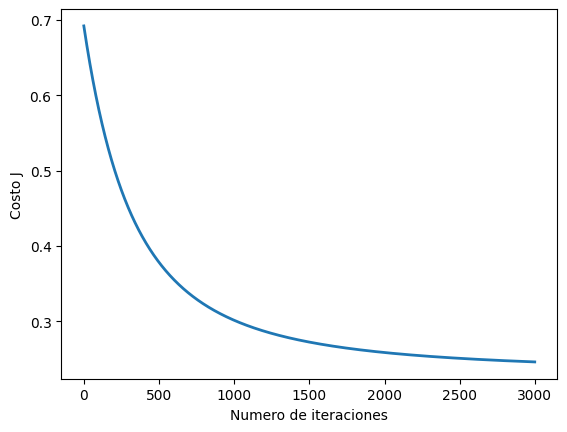

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.007
num_iters = 3000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(18)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1,30,1,0,1,5,30,1,1,4,2,1,1,2,5,1,0,1]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('El valor predecido de tener una enfermedad cardiaca es(usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [ ]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)
    
    return J, grad

In [ ]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
[ 0.41440454 -0.01449276 -0.03014872  0.00897481 -0.05506778 -0.04776188
 -0.0079987  -0.05630511 -0.01959493 -0.06530635 -0.00975085 -0.04715531
  0.02798495  0.00309473 -0.00232951 -0.01159465 -0.04062118 -0.02610687]
Gradiente en theta inicial (zeros):
	[0.4144, -0.0145, -0.0301]


In [ ]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero
test_theta = np.array([ 0.41440454, -0.01449276, -0.03014872,  0.00897481, -0.05506778, -0.04776188,
-0.0079987,  -0.05630511, -0.01959493, -0.06530635, -0.00975085, -0.04715531,
0.02798495,  0.00309473, -0.00232951, -0.01159465, -0.04062118, -0.02610687])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f}]'.format(*grad))

[ 0.41440454 -0.01449276 -0.03014872  0.00897481 -0.05506778 -0.04776188
 -0.0079987  -0.05630511 -0.01959493 -0.06530635 -0.00975085 -0.04715531
  0.02798495  0.00309473 -0.00232951 -0.01159465 -0.04062118 -0.02610687]
Costo en theta prueba: 0.911
Gradiente en theta prueba:
	[0.516, -0.026, -0.046,0.013, -0.078, -0.076,-0.015, -0.089, -0.022,-0.094, -0.014, -0.071,0.048, 0.004, -0.003,-0.018, -0.061, -0.040]


In [ ]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f},{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

C:\Users\hlope\AppData\Local\Temp\ipykernel_5932\3090360450.py:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.233
theta:
	[-3.065, 0.093, 0.216,-0.065, 0.220, 0.171,0.083, 0.141, 0.367,1.010, 0.040, 0.213,-0.038, -0.048, -0.048,0.119, 0.131, 0.035]


In [ ]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).
    
    X : array_like
        Datos utilizados para el calculo de las predicciones. 
        La fila es el numero de los puntos para calcular las predicciones, 
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X. 
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [ ]:
# Predice la probabilidad de que una persona tenga una enfermedad cardiaca
prob = sigmoid(np.dot([1, 16.60,	1,	0,	0,	3.0,	30.0,	0,	0,	7,	5,	2,	1,	4,	5.0,	1,	0,	1], theta))
print('Para una hombre con distintas especificaciones tiene una probabilidad de tener una enfermedad cardiaca de: {:.3f}%'.format(prob))

# Precisión de cálculo en nuestro conjunto de entrenamiento
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))


Para una hombre con distintas especificaciones tiene una probabilidad de tener una enfermedad cardiaca de: 1.000%
Precisión de entrenamiento: 91.50 %
